### Wind Speed and Sea State at Pylos and Tanganyika

In [1]:
from scipy.integrate import quad
from scipy.integrate import simps
import matplotlib.pyplot as plt
import numpy as np

With data from the following site the wind speeds are tabulated:

https://www.meteoblue.com/en/weather/historyclimate/climatemodelled/36.725N21.499E
https://www.meteoblue.com/en/weather/historyclimate/climatemodelled/-7.360N30.333E

For each month it is measured for how many days the wind speed falls between two values. It is slotted as follows in m/s:

[between 0-0.3, between 0.3-1.4, between 1.4-3.3, between 3.3-5.3, between 5.3-7.8, between 7.8-10.6, between 10.6-13.9, between 13.9-16.9, above 16.9]

In [2]:
# Pylos
Jan = [0, 2.1, 16.7, 9.7, 1.8, 0.6, 0.1, 0, 0]
Feb = [0, 0.9, 13.5, 10.8, 2, 0.8, 0.2, 0, 0]
Mar = [0, 0.6, 15.9, 11.5, 2.6, 0.3, 0.2, 0, 0]
Apr = [0, 0.9, 16.5, 10.3, 2.1, 0.1, 0, 0, 0]
May = [0, 1.2, 20, 8.5, 1.3, 0.1, 0, 0, 0]
Jun = [0, 1, 18.3, 9, 1.7, 0, 0, 0, 0]
Jul = [0, 0.8, 21.5, 7.5, 1.2, 0, 0, 0, 0]
Aug = [0, 1.4, 21.2, 6.8, 1.5, 0, 0, 0, 0]
Sep = [0, 1, 21, 6.6, 1.3, 0, 0, 0, 0]
Oct = [0, 1.6, 21.5, 6.9, 0.9, 0, 0, 0, 0]
Nov = [0, 1.8, 18, 8.3, 1.7, 0.2, 0.1, 0, 0]
Dec = [0, 1.7, 16.5, 10.7, 1.8, 0.3, 0.1, 0, 0]

In [3]:
# Tanganyika
TJan = [0, 6.1, 24.2, 0.7, 0, 0, 0, 0, 0]
TFeb = [0, 3.7, 22.6, 1.9, 0, 0, 0, 0, 0]
TMar = [0, 3.5, 24.4, 3.1, 0, 0, 0, 0, 0]
TApr = [0, 1.7, 20.1, 8, 0.2, 0, 0, 0, 0]
TMay = [0, 0.4, 17.9, 12.5, 0.2, 0, 0, 0, 0]
TJun = [0, 0.3, 12.5, 16, 1.2, 0, 0, 0, 0]
TJul = [0, 0, 12.7, 17.2, 1.1, 0, 0, 0, 0]
TAug = [0, 0.1, 15.7, 14.6, 0.6, 0, 0, 0, 0]
TSep = [0, 0.1, 16.1, 12.9, 0.8, 0, 0, 0, 0]
TOct = [0, 0.1, 19.3, 11.1, 0.5, 0, 0, 0, 0]
TNov = [0, 1.2, 21.8, 7, 0, 0, 0, 0, 0]
TDec = [0, 6.5, 22.5, 2, 0, 0, 0, 0, 0]

In [4]:
#Azores
AJan = [0, 0, 0.3, 1.6, 6.1, 9.6, 8.6, 3.8, 1]
AFeb = [0, 0, 0.4, 1.4, 6.8, 8.3, 6.7, 3.5, 1.1]
AMar = [0, 0, 0.4, 2.8, 7.1, 9.5, 7.3, 3.1, 0.9]
AApr = [0, 0, 0.6, 2.9, 8.8, 9.6, 5.7, 1.8, 0.5]
AMay = [0, 0.1, 1.2, 4.3, 11.3, 9.3, 4, 0.8, 0]
AJun = [0, 0, 1.7, 6.9, 12.8, 6.9, 1.5, 0.1, 0]
AJul = [0, 0.2, 2.9, 8.8, 15.3, 3.6, 0.3, 0, 0]
AAug = [0, 0, 2.3, 7.7, 15.3, 5, 0.6, 0.1, 0]
ASep = [0, 0, 1.2, 5.6, 12.3, 7.7, 2.6, 0.4, 0.1]
AOct = [0, 0, 0.4, 2.7, 8, 10.7, 6.8, 2, 0.4]
ANov = [0, 0, 0.4, 1.9, 7.2, 9.7, 6.7, 3.2, 0.9]
ADec = [0, 0, 0.4, 2, 5.8, 8.2, 8.1, 4.7, 1.7]

In [5]:
wind_speed_kmh = [0, 1, 5, 12, 19, 28, 38, 50, 61]
wind_speed_ms = [round(i / 3.6, 1) for i in wind_speed_kmh]

print(wind_speed_ms)

[0.0, 0.3, 1.4, 3.3, 5.3, 7.8, 10.6, 13.9, 16.9]


In [6]:
year = [a + b + c + d + e + f + g + h + i + j + k + l for a, b, c, d, e, f, g, h, i, j, k, l 
         in zip(Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec)]

print(year)

[0, 15.0, 220.6, 106.6, 19.9, 2.4, 0.7, 0, 0]


In [7]:
Tyear = [a + b + c + d + e + f + g + h + i + j + k + l for a, b, c, d, e, f, g, h, i, j, k, l 
         in zip(TJan, TFeb, TMar, TApr, TMay, TJun, TJul, TAug, TSep, TOct, TNov, TDec)]

print(Tyear)

[0, 23.7, 229.79999999999998, 107.0, 4.6000000000000005, 0, 0, 0, 0]


In [8]:
Ayear = [a + b + c + d + e + f + g + h + i + j + k + l for a, b, c, d, e, f, g, h, i, j, k, l 
         in zip(AJan, AFeb, AMar, AApr, AMay, AJun, AJul, AAug, ASep, AOct, ANov, ADec)]

print(Ayear)

[0, 0.30000000000000004, 12.200000000000001, 48.6, 116.8, 98.10000000000001, 58.9, 23.5, 6.6000000000000005]


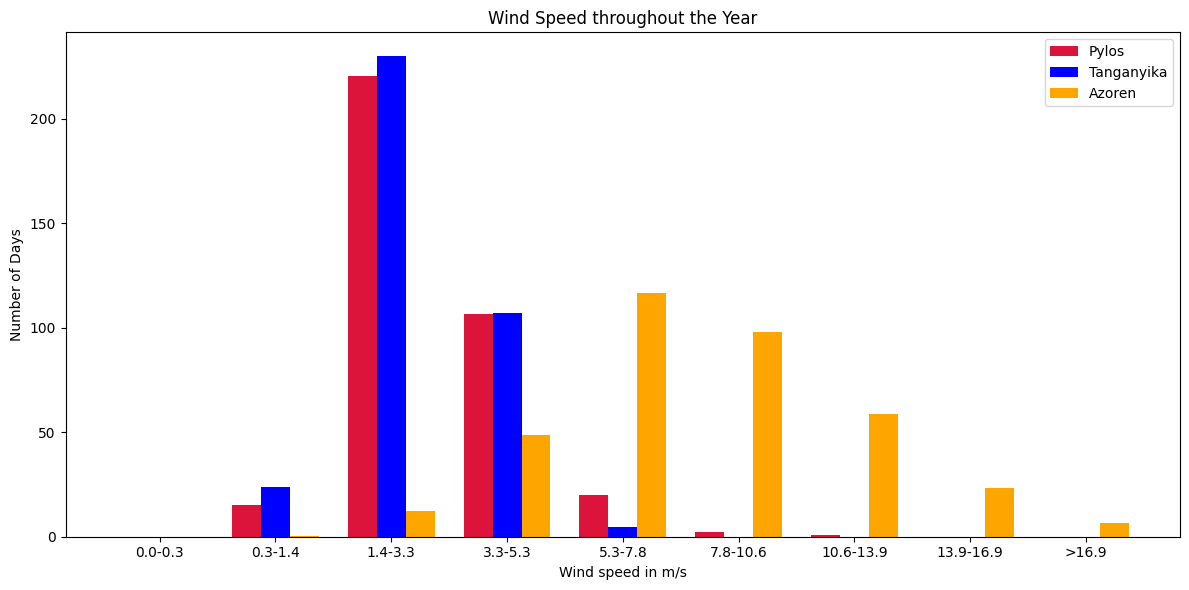

In [9]:
# creating the labels
speeds = ['0.0-0.3', '0.3-1.4', '1.4-3.3', '3.3-5.3', '5.3-7.8', '7.8-10.6', '10.6-13.9', '13.9-16.9', '>16.9']
 
# Start figure
fig = plt.figure(figsize=(12, 6))

# Creating the bar plot
bar_width = 0.25
index = range(len(speeds))
plt.bar(index, year, color='crimson', width=bar_width, label='Pylos')
plt.bar([i + bar_width for i in index], Tyear, color='blue', width=bar_width, label='Tanganyika')
plt.bar([i + 2 * bar_width for i in index], Ayear, color='orange', width=bar_width, label='Azoren')

plt.xlabel("Wind speed in m/s")
plt.ylabel("Number of Days")
plt.title("Wind Speed throughout the Year")
plt.xticks([i + bar_width for i in index], speeds)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

From the following paper a direct correlation between sea state noise and wind speed is made which will be used:
https://apps.dtic.mil/sti/tr/pdf/ADA460546.pdf

In [10]:
sea_state = [0, 0.5, 1, 2, 3, 4, 5, 6, 6]

max_wind_speed_sea_state = [0.2, 1.5, 3.3, 5.4, 7.9, 10.7, 13.8, 17.1, 20.7]

# the wind_speed_ms is defined as smalles value but we want it to be the maximum wind speed ik can be
max_wind_speed_ms = wind_speed_ms[1:]

# for the last value just put in a large value
max_wind_speed_ms.append(20)


print(max_wind_speed_sea_state)
print(max_wind_speed_ms)

[0.2, 1.5, 3.3, 5.4, 7.9, 10.7, 13.8, 17.1, 20.7]
[0.3, 1.4, 3.3, 5.3, 7.8, 10.6, 13.9, 16.9, 20]


In [11]:
# Pylos
days_each_sea_state = [0]

for i in range(1,len(max_wind_speed_ms)):
    maxi = max_wind_speed_sea_state[i]
    
    index = []

    
    for j in range(len(max_wind_speed_ms)):
        value = max_wind_speed_ms[j]
        
        if maxi >= value:
            index.append(j)
        
            number_of_days = 0
        
    for k in range(len(index)):
        number_of_days = number_of_days + year[index[k]]
            
    days_each_sea_state.append(number_of_days)
            
        
print(days_each_sea_state)

[0, 15.0, 235.6, 342.2, 362.09999999999997, 364.49999999999994, 364.49999999999994, 365.19999999999993, 365.19999999999993]


In [12]:
#Tanganyika
Tdays_each_sea_state = [0]

for i in range(1,len(max_wind_speed_ms)):
    maxi = max_wind_speed_sea_state[i]
    
    index = []

    
    for j in range(len(max_wind_speed_ms)):
        value = max_wind_speed_ms[j]
        
        if maxi >= value:
            index.append(j)
        
            number_of_days = 0
        
    for k in range(len(index)):
        number_of_days = number_of_days + Tyear[index[k]]
            
    Tdays_each_sea_state.append(number_of_days)
            
        
print(Tdays_each_sea_state)

[0, 23.7, 253.49999999999997, 360.5, 365.1, 365.1, 365.1, 365.1, 365.1]


In [13]:
#Azores
Adays_each_sea_state = [0]

for i in range(1,len(max_wind_speed_ms)):
    maxi = max_wind_speed_sea_state[i]
    
    index = []

    
    for j in range(len(max_wind_speed_ms)):
        value = max_wind_speed_ms[j]
        
        if maxi >= value:
            index.append(j)
        
            number_of_days = 0
        
    for k in range(len(index)):
        number_of_days = number_of_days + Ayear[index[k]]
            
    Adays_each_sea_state.append(number_of_days)
            
        
print(Adays_each_sea_state)

[0, 0.30000000000000004, 12.500000000000002, 61.1, 177.9, 276.0, 276.0, 358.4, 365.0]


In [14]:
# Pylos
days_state = [0]

for i in range(1, len(days_each_sea_state)):
    days_absolute = days_each_sea_state[i] - days_each_sea_state[i - 1]
    days_state.append(days_absolute)
    
print(days_state)

days_state_adapted = days_state[:-1]

print(days_state_adapted)

[0, 15.0, 220.6, 106.6, 19.899999999999977, 2.3999999999999773, 0.0, 0.6999999999999886, 0.0]
[0, 15.0, 220.6, 106.6, 19.899999999999977, 2.3999999999999773, 0.0, 0.6999999999999886]


In [15]:
# Tanganyika
Tdays_state = [0]

for i in range(1, len(Tdays_each_sea_state)):
    days_absolute = Tdays_each_sea_state[i] - Tdays_each_sea_state[i - 1]
    Tdays_state.append(days_absolute)
    
print(Tdays_state)

Tdays_state_adapted = Tdays_state[:-1]

print(Tdays_state_adapted)

[0, 23.7, 229.79999999999998, 107.00000000000003, 4.600000000000023, 0.0, 0.0, 0.0, 0.0]
[0, 23.7, 229.79999999999998, 107.00000000000003, 4.600000000000023, 0.0, 0.0, 0.0]


In [16]:
# Azores
Adays_state = [0]

for i in range(1, len(Adays_each_sea_state)):
    days_absolute = Adays_each_sea_state[i] - Adays_each_sea_state[i - 1]
    Adays_state.append(days_absolute)
    
print(Adays_state)

Adays_state_adapted = Adays_state[:-1]

Adays_state_adapted[-1] = Adays_state_adapted[-1] + Adays_state[-1]

print(Adays_state_adapted)

[0, 0.30000000000000004, 12.200000000000001, 48.6, 116.80000000000001, 98.1, 0.0, 82.39999999999998, 6.600000000000023]
[0, 0.30000000000000004, 12.200000000000001, 48.6, 116.80000000000001, 98.1, 0.0, 89.0]


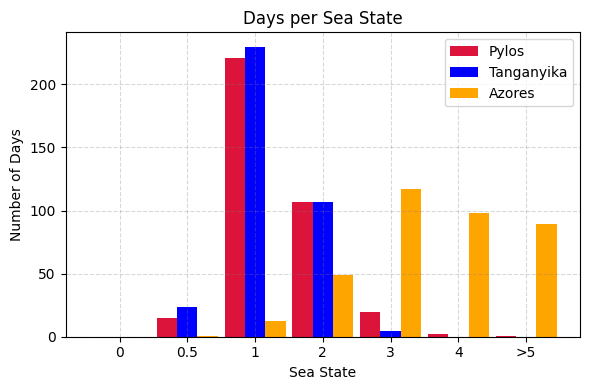

In [17]:
# creating the labels
speeds = ['0.0-0.3', '0.3-1.4', '1.4-3.3', '3.3-5.3', '5.3-7.8', '7.8-10.6', '10.6-13.9', '13.9-16.9', '>16.9']
 
# Start figure
fig = plt.figure(figsize=(6, 4))

# for the final plotting do the following, otherwise remove
days_state_adapted_new = [0, 15.0, 220.6, 106.6, 19.899999999999977, 2.3999999999999773, 0.6999999999999886]
Tdays_state_adapted_new = [0, 23.7, 229.79999999999998, 107.00000000000003, 4.600000000000023, 0.0, 0.0]
Adays_state_adapted_new =[0, 0.30000000000000004, 12.200000000000001, 48.6, 116.80000000000001, 98.1, 89.0]




# Creating the bar plot
bar_width = 0.3
index = range(len(sea_state[:-2]))
plt.bar(index, days_state_adapted_new, color='crimson', width=bar_width, label='Pylos')
plt.bar([i + bar_width for i in index], Tdays_state_adapted_new, color='blue', width=bar_width, label='Tanganyika')
plt.bar([i + 2 * bar_width for i in index], Adays_state_adapted_new, color='orange', width=bar_width, label='Azores')

sea_state_new = ['0', '0.5', '1', '2', '3', '4', '>5']
  

plt.xlabel("Sea State")
plt.ylabel("Number of Days")
plt.title("Days per Sea State")
plt.xticks([i + bar_width for i in index], sea_state_new)
plt.legend()

# Show the plot
plt.tight_layout()
plt.legend()
plt.grid(True, linestyle='--', color='gray', alpha=0.3)

plt.savefig('Days per Sea State.jpg')

# Show the plot
plt.show()

In [18]:
months = [Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec]
Tmonths = [TJan, TFeb, TMar, TApr, TMay, TJun, TJul, TAug, TSep, TOct, TNov, TDec]
Amonths = [AJan, AFeb, AMar, AApr, AMay, AJun, AJul, AAug, ASep, AOct, ANov, ADec]

# Pylos
days_each_sea_state_per_month = []

for list in months:
    days_each_sea_state = [0]

    for i in range(1,len(max_wind_speed_ms)):
        maxi = max_wind_speed_sea_state[i]

        index = []


        for j in range(len(max_wind_speed_ms)):
            value = max_wind_speed_ms[j]

            if maxi >= value:
                index.append(j)

                number_of_days = 0

        for k in range(len(index)):
            number_of_days = number_of_days + list[index[k]]

        days_each_sea_state.append(number_of_days)
    
    days_each_sea_state_per_month.append(days_each_sea_state)
    
# Tanganyika
Tdays_each_sea_state_per_month = []

for list in Tmonths:
    days_each_sea_state = [0]

    for i in range(1,len(max_wind_speed_ms)):
        maxi = max_wind_speed_sea_state[i]

        index = []


        for j in range(len(max_wind_speed_ms)):
            value = max_wind_speed_ms[j]

            if maxi >= value:
                index.append(j)

                number_of_days = 0

        for k in range(len(index)):
            number_of_days = number_of_days + list[index[k]]

        days_each_sea_state.append(number_of_days)
    
    Tdays_each_sea_state_per_month.append(days_each_sea_state)
    
# Azores
Adays_each_sea_state_per_month = []

for list in Amonths:
    days_each_sea_state = [0]

    for i in range(1,len(max_wind_speed_ms)):
        maxi = max_wind_speed_sea_state[i]

        index = []


        for j in range(len(max_wind_speed_ms)):
            value = max_wind_speed_ms[j]

            if maxi >= value:
                index.append(j)

                number_of_days = 0

        for k in range(len(index)):
            number_of_days = number_of_days + list[index[k]]

        days_each_sea_state.append(number_of_days)
    
    Adays_each_sea_state_per_month.append(days_each_sea_state)

In [19]:
# Pylos
monthly = []

for list in days_each_sea_state_per_month:
    days_state = [0]

    for i in range(1, len(list)):
        days_absolute = list[i] - list[i - 1]
        days_state.append(days_absolute)
    
    monthly.append(days_state)

In [20]:
# Tanganyika
Tmonthly = []

for list in Tdays_each_sea_state_per_month:
    days_state = [0]

    for i in range(1, len(list)):
        days_absolute = list[i] - list[i - 1]
        days_state.append(days_absolute)
    
    Tmonthly.append(days_state)

In [21]:
# Tanganyika
Amonthly = []

for list in Adays_each_sea_state_per_month:
    days_state = [0]

    for i in range(1, len(list)):
        days_absolute = list[i] - list[i - 1]
        days_state.append(days_absolute)
    
    Amonthly.append(days_state)
    
print(len(Amonthly[1]))

9


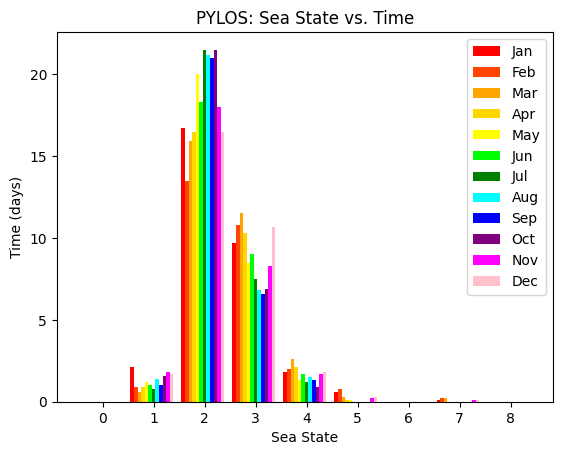

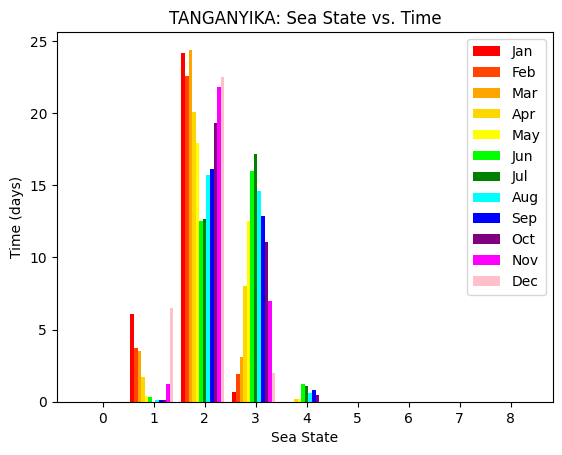

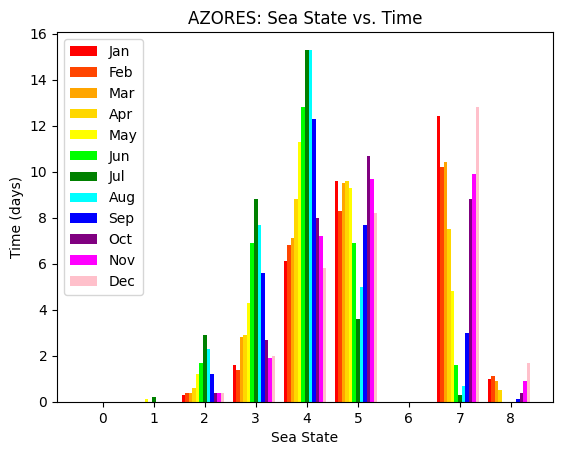

In [22]:
# Pylos
colors = ['red', 'orangered', 'orange', 'gold', 'yellow', 'lime', 'green', 'cyan', 'blue', 'purple', 'magenta', 'pink']
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# set the bar width
bar_width = 0.07
x = np.arange(len(sea_state))

for i, list in enumerate(monthly):
    # calculate the x-axis position for the bars  
    x_position = x - 6*0.07 + i * bar_width
    
    # plot the sea state against the amount of days that it occurs per month
    plt.bar(x_position, list, width=bar_width, color=colors[i], label=labels[i])
    
    
# Add labels and a title
plt.xlabel('Sea State')
plt.ylabel('Time (days)')

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.legend()
plt.title('PYLOS: Sea State vs. Time')

# Show the plot
plt.show()




# Tanganyika
colors = ['red', 'orangered', 'orange', 'gold', 'yellow', 'lime', 'green', 'cyan', 'blue', 'purple', 'magenta', 'pink']
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i, list in enumerate(Tmonthly):
    # calculate the x-axis position for the bars  
    x_position = x - 6*0.07 + i * bar_width
    
    # plot the sea state against the amount of days that it occurs per month
    plt.bar(x_position, list, width=bar_width, color=colors[i], label=labels[i])

# Add labels and a title
plt.xlabel('Sea State')
plt.ylabel('Time (days)')

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.legend()
plt.title('TANGANYIKA: Sea State vs. Time')

# Show the plot
plt.show()




# Azores
colors = ['red', 'orangered', 'orange', 'gold', 'yellow', 'lime', 'green', 'cyan', 'blue', 'purple', 'magenta', 'pink']
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i, list in enumerate(Amonthly):
    # calculate the x-axis position for the bars  
    x_position = x - 6*0.07 + i * bar_width
    
    # plot the sea state against the amount of days that it occurs per month
    plt.bar(x_position, list, width=bar_width, color=colors[i], label=labels[i])

# Add labels and a title
plt.xlabel('Sea State')
plt.ylabel('Time (days)')

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.legend()
plt.title('AZORES: Sea State vs. Time')

# Show the plot
plt.show()

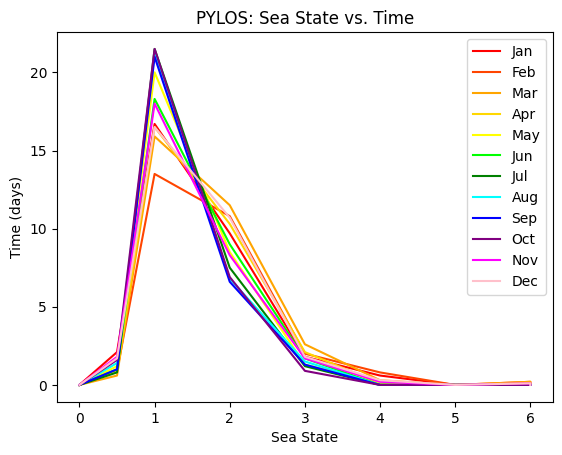

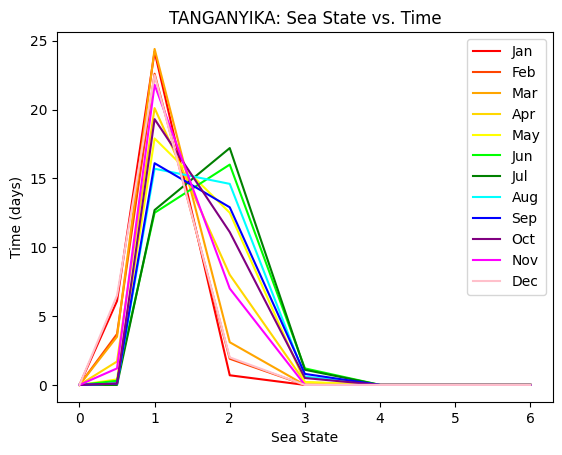

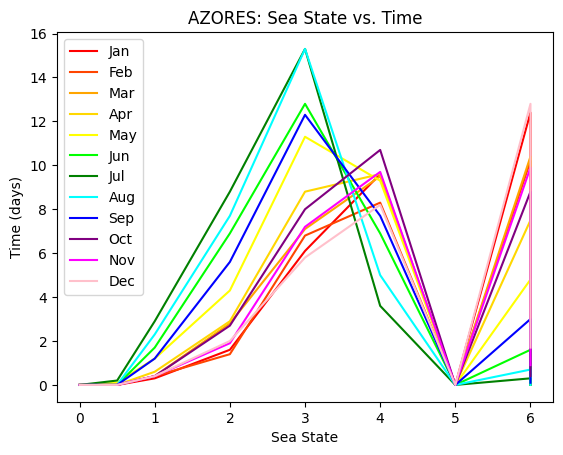

In [23]:
# Pylos
colors = ['red', 'orangered', 'orange', 'gold', 'yellow', 'lime', 'green', 'cyan', 'blue', 'purple', 'magenta', 'pink']
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# set the bar width
bar_width = 0.07
x = np.arange(len(sea_state))

for i, list in enumerate(monthly):    
    # plot the sea state against the amount of days that it occurs per month
    plt.plot(sea_state, list, color=colors[i], label=labels[i])
    
    
# Add labels and a title
plt.xlabel('Sea State')
plt.ylabel('Time (days)')

plt.xticks([0, 1, 2, 3, 4, 5, 6])
plt.legend()
plt.title('PYLOS: Sea State vs. Time')

# Show the plot
plt.show()




# Tanganyika
colors = ['red', 'orangered', 'orange', 'gold', 'yellow', 'lime', 'green', 'cyan', 'blue', 'purple', 'magenta', 'pink']
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i, list in enumerate(Tmonthly):
    # plot the sea state against the amount of days that it occurs per month
    plt.plot(sea_state, list, color=colors[i], label=labels[i])

# Add labels and a title
plt.xlabel('Sea State')
plt.ylabel('Time (days)')

plt.xticks([0, 1, 2, 3, 4, 5, 6])
plt.legend()
plt.title('TANGANYIKA: Sea State vs. Time')

# Show the plot
plt.show()




# Azores
colors = ['red', 'orangered', 'orange', 'gold', 'yellow', 'lime', 'green', 'cyan', 'blue', 'purple', 'magenta', 'pink']
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i, list in enumerate(Amonthly):
    # plot the sea state against the amount of days that it occurs per month
    plt.plot(sea_state, list, color=colors[i], label=labels[i])

# Add labels and a title
plt.xlabel('Sea State')
plt.ylabel('Time (days)')

plt.xticks([0, 1, 2, 3, 4, 5, 6])
plt.legend()
plt.title('AZORES: Sea State vs. Time')

# Show the plot
plt.show()

In [24]:
# Pylos
# Average Sea State each month
average_monthly = []

for list in monthly:
    
    sea_state_times_days_added = 0
    
    for i in range(len(list)):
        value = list[i] * sea_state[i]
        sea_state_times_days_added = sea_state_times_days_added + value
        
    average = sea_state_times_days_added / sum(list)
    
    average_monthly.append(average)
    
print(average_monthly)

[1.4693548387096775, 1.6294326241134751, 1.5884244372990355, 1.4799331103678932, 1.347266881028939, 1.3966666666666663, 1.3064516129032258, 1.2944983818770228, 1.290969899665552, 1.2556634304207117, 1.3953488372093024, 1.4774919614147914]


In [25]:
# Tanganyika
# Average Sea State each month
Taverage_monthly = []

for list in Tmonthly:
    
    sea_state_times_days_added = 0
    
    for i in range(len(list)):
        value = list[i] * sea_state[i]
        sea_state_times_days_added = sea_state_times_days_added + value
        
    average = sea_state_times_days_added / sum(list)
    
    Taverage_monthly.append(average)
    
print(Taverage_monthly)

[0.9241935483870968, 1.00177304964539, 1.0435483870967743, 1.2516666666666665, 1.4096774193548385, 1.6083333333333334, 1.6258064516129032, 1.5080645161290325, 1.4832775919732444, 1.3887096774193548, 1.2133333333333336, 0.9596774193548387]


In [26]:
# Azores
# Average Sea State each month
Aaverage_monthly = []

for list in Amonthly:
    
    sea_state_times_days_added = 0
    
    for i in range(len(list)):
        value = list[i] * sea_state[i]
        sea_state_times_days_added = sea_state_times_days_added + value
        
    average = sea_state_times_days_added / sum(list)
    
    Aaverage_monthly.append(average)
    
print(Aaverage_monthly)

[4.5354838709677425, 4.418439716312057, 4.279742765273311, 3.9866220735785953, 3.5403225806451615, 3.046822742474917, 2.659163987138264, 2.8322580645161297, 3.301003344481605, 4.122580645161291, 4.3133333333333335, 4.58252427184466]


1.2848384495255671
1.4109585568063576


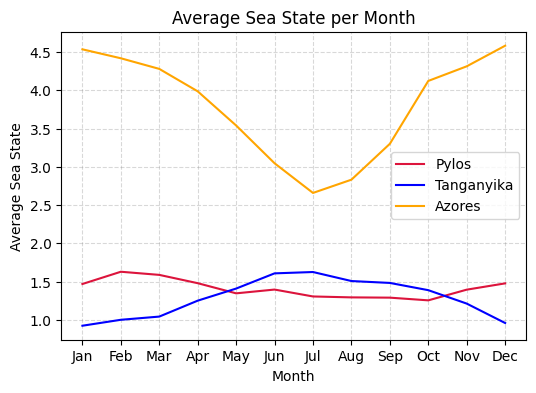

In [29]:
plt.figure(figsize=(6, 4))


# plot the average sea state against the month that it occurs
plt.plot(labels, average_monthly, color='crimson', label='Pylos')
plt.plot(labels, Taverage_monthly, color='blue', label='Tanganyika')
plt.plot(labels, Aaverage_monthly, color='orange', label='Azores')

# Add labels and a title
plt.xlabel('Month')
plt.ylabel('Average Sea State')

plt.legend()
plt.title('Average Sea State per Month')
plt.grid(True, linestyle='--', color='gray', alpha=0.3)

#plt.savefig('Average Sea State per Month.jpg')

sumT = np.sum(Taverage_monthly)
sumP = np.sum(average_monthly)

yearly_averageT = sumT/12
yearly_averageP = sumP/12

print(yearly_averageT)
print(yearly_averageP)

# Show the plot
plt.show()

# Check with another paper

The wind speed can also be taken from the following paper: https://link.springer.com/article/10.1007/s00382-016-3020-z

In [31]:
# TAKEN FROM FIGURE 5

#Tanganyika North
TNorth = [2, 2.05, 2.2, 2.9, 3.4, 3.7, 3.6, 3.2, 3.0, 2.7, 2.5, 2.1]

#Tanganyika South
TSouth = [2.3, 2.5, 3.2, 4.4, 4.3, 4.5, 4.55, 3.9, 3.6, 3.4, 3.0, 2.5]

#Tanganyika Centre
TCentre = [3.15, 3.05, 4.0, 6.35, 6.45, 6.6, 6.2, 5.6, 5.0, 4.6, 3.6, 3.5]

#Tanganyika Whole
TWhole = [2.6, 2.65, 3.2, 4.5, 4.55, 4.7, 4.65, 4.2, 3.9, 3.7, 3.1, 2.8]

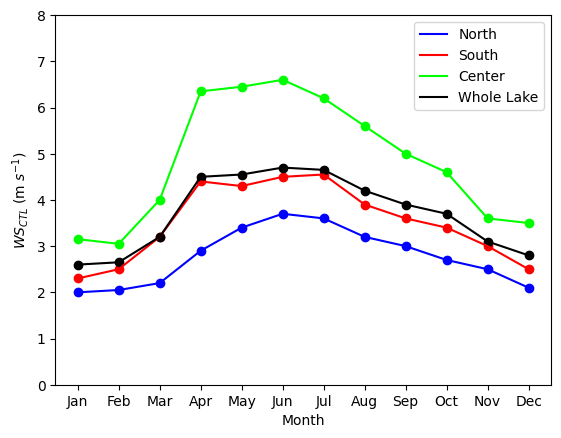

In [32]:
plt.plot(labels, TNorth, color='blue', label='North')
plt.plot(labels, TSouth, color='red', label='South')
plt.plot(labels, TCentre, color='lime', label='Center')
plt.plot(labels, TWhole, color='black', label='Whole Lake')

plt.scatter(labels, TNorth, color='blue')
plt.scatter(labels, TSouth, color='red')
plt.scatter(labels, TCentre, color='lime')
plt.scatter(labels, TWhole, color='black')

plt.xlabel('Month')
plt.ylabel('$WS_{CTL}$ (m $s^{-1}$)')
plt.ylim(0, 8)

plt.legend()

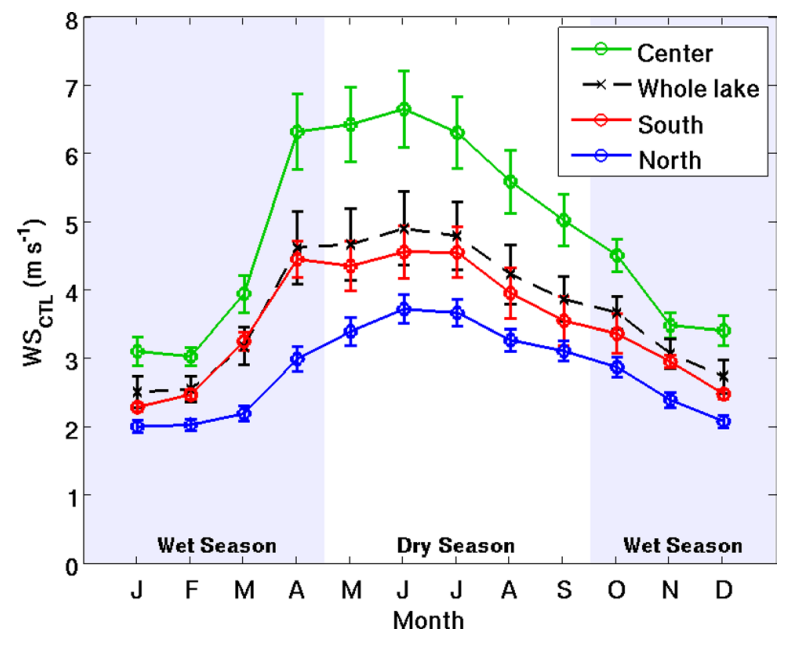

Try to calculate the average wind speed for each of the months for the other data by taking an average wind speed per block. Also calculate the minimum and maximum values for the range.

In [33]:
# all windspeed
minimum_wind_speeds = [0.0, 0.3, 1.4, 3.3, 5.3, 7.8, 10.6, 13.9, 16.9]
average_wind_speeds = [0.15, 0.85, 2.35, 4.3, 6.55, 9.2, 12.25, 15.4]
maximum_wind_speeds = [0.3, 1.4, 3.3, 5.3, 7.8, 10.6, 13.9, 16.9, 20]

minimum = []
average = []
maximum = []

# Average wind speed calculation for each month
for month_data in [TJan, TFeb, TMar, TApr, TMay, TJun, TJul, TAug, TSep, TOct, TNov, TDec]:
    total_days = sum(month_data)
    
    min_total_wind_speed = sum(avg * days for avg, days in zip(minimum_wind_speeds, month_data))
    total_wind_speed = sum(avg * days for avg, days in zip(average_wind_speeds, month_data))
    max_total_wind_speed = sum(avg * days for avg, days in zip(maximum_wind_speeds, month_data))

    minimum_wind_speed = min_total_wind_speed / total_days 
    average_wind_speed = total_wind_speed / total_days
    maximum_wind_speed = max_total_wind_speed / total_days

    minimum.append(minimum_wind_speed)
    average.append(average_wind_speed)
    maximum.append(maximum_wind_speed)
    
# Print the average wind speed for each month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for month, avg_wind_speed in zip(months, average):
    print(f"Average wind speed for {month}: {avg_wind_speed:.2f} m/s")

Average wind speed for January: 2.10 m/s
Average wind speed for February: 2.28 m/s
Average wind speed for March: 2.38 m/s
Average wind speed for April: 2.81 m/s
Average wind speed for May: 3.14 m/s
Average wind speed for June: 3.54 m/s
Average wind speed for July: 3.58 m/s
Average wind speed for August: 3.34 m/s
Average wind speed for September: 3.30 m/s
Average wind speed for October: 3.11 m/s
Average wind speed for November: 2.75 m/s
Average wind speed for December: 2.16 m/s


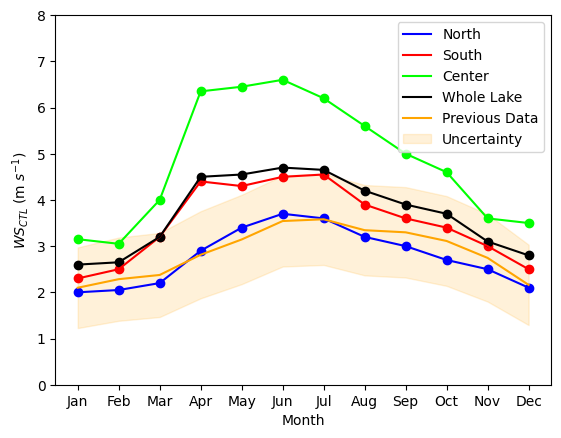

In [35]:
plt.plot(labels, TNorth, color='blue', label='North')
plt.plot(labels, TSouth, color='red', label='South')
plt.plot(labels, TCentre, color='lime', label='Center')
plt.plot(labels, TWhole, color='black', label='Whole Lake')
plt.plot(labels, average, color='orange', label='Previous Data')
plt.fill_between(labels, minimum, maximum, color='orange', alpha=0.15, label='Uncertainty')


plt.scatter(labels, TNorth, color='blue')
plt.scatter(labels, TSouth, color='red')
plt.scatter(labels, TCentre, color='lime')
plt.scatter(labels, TWhole, color='black')

plt.xlabel('Month')
plt.ylabel('$WS_{CTL}$ (m $s^{-1}$)')
plt.ylim(0, 8)

plt.legend(loc='upper right')

They seem to be far off, since the detector is located close to the centre, take that as data.

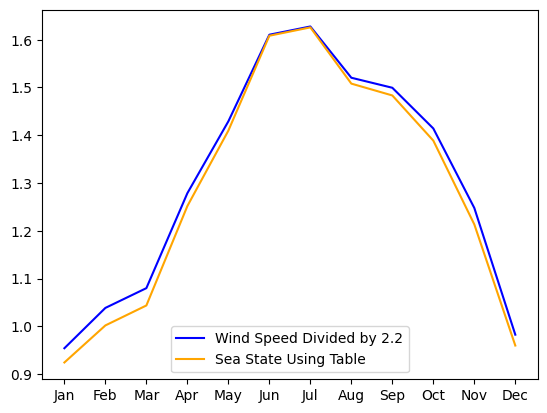

In [36]:
average_weighted = [i / 2.2 for i in average]

plt.plot(labels, average_weighted, color='blue', label='Wind Speed Divided by 2.2')
plt.plot(labels, Taverage_monthly, color='orange', label='Sea State Using Table')

plt.legend()

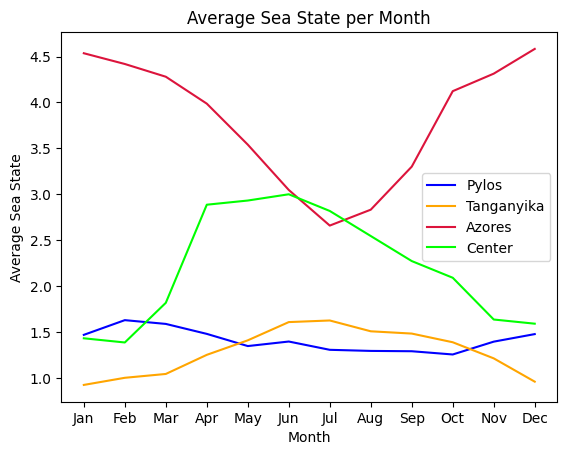

In [37]:
TCentre_weighted = [i / 2.2 for i in TCentre]

# plot the average sea state against the month that it occurs
plt.plot(labels, average_monthly, color='blue', label='Pylos')
plt.plot(labels, Taverage_monthly, color='orange', label='Tanganyika')
plt.plot(labels, Aaverage_monthly, color='crimson', label='Azores')
plt.plot(labels, TCentre_weighted, color='Lime', label='Center')

# Add labels and a title
plt.xlabel('Month')
plt.ylabel('Average Sea State')

plt.legend()
plt.title('Average Sea State per Month')

# Show the plot
plt.show()